In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl()
rec = Recognizer("test")
emb_maniger = EmbedingsManiger(cache_ram=True)
pe = PersonEmbeding()

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(emb_maniger.info)

{'Arturas'}


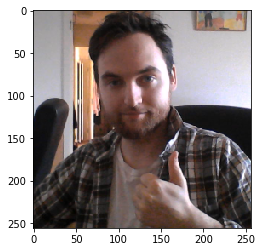

In [3]:
emb_maniger.show("Arturas")

In [5]:
#emb_maniger.remove("Arturas")

True

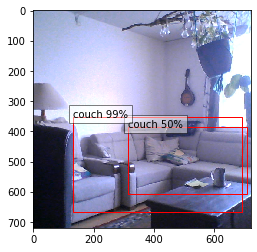

In [46]:
ppl = lp.snap()

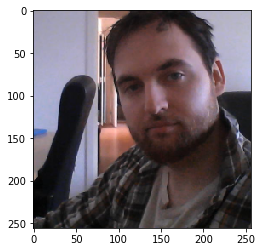

In [14]:
plt.imshow(ppl[0])
plt.show()

In [6]:
p = next(iter(ppl))
print(p.shape)
emb = pe.embed(ppl)
print(emb.shape)
r = rec(emb)
print(r)

(256, 256, 3)
torch.Size([1, 512])
tensor([[0.4489, 0.5511]])


In [43]:
a = []

In [44]:
def get_data(data, it=3):
    c = 0
    for img in lp:
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

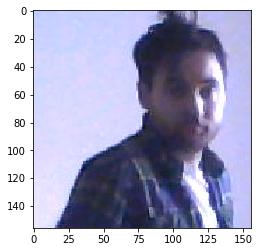

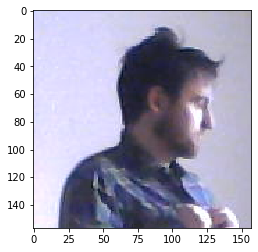

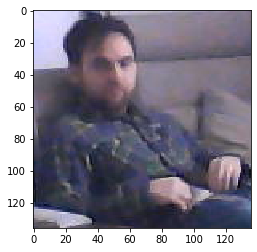

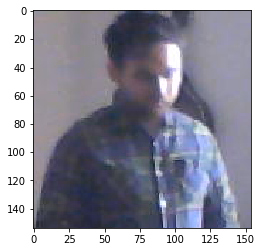

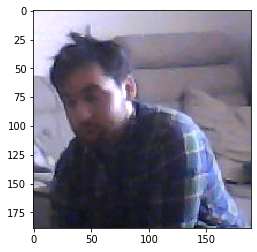

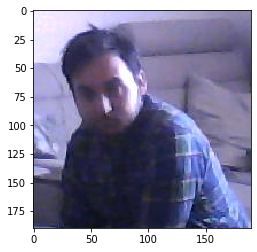

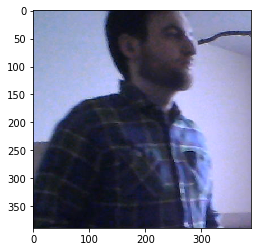

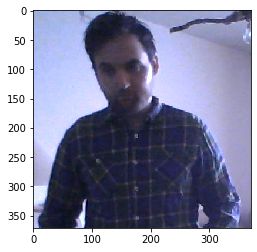

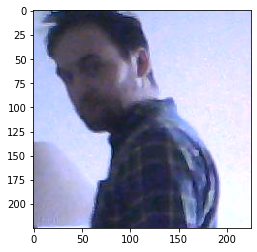

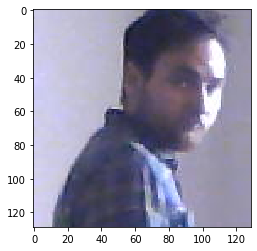

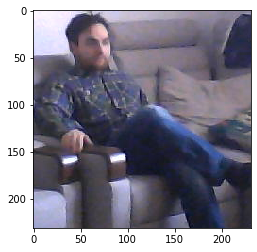

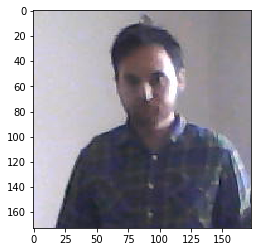

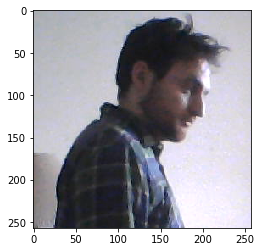

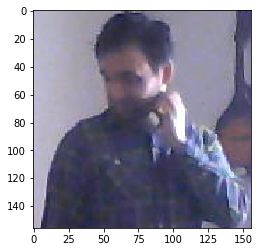

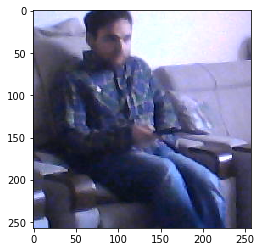

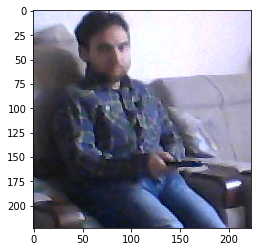

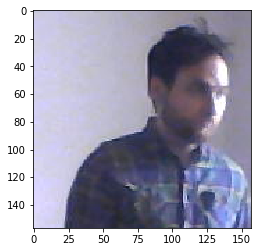

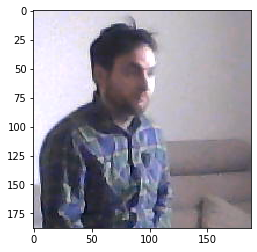

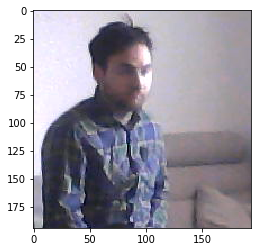

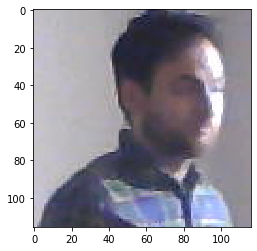

320

In [47]:
get_data(a, 20)
len(a)

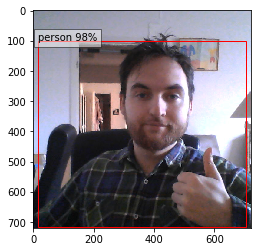

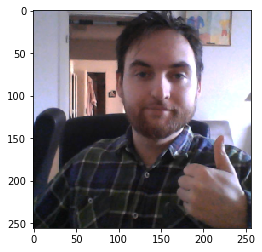

In [48]:
ppl = lp.snap()

In [49]:
emb_maniger.new("ArturasGreenT", ppl[0], a)

#emb_maniger.add("Arturas", a)

True

In [50]:
for n in emb_maniger.info:
    print(n, emb_maniger.get_len(n))
    

ArturasGreenT 320
ArturasBlueHoody 320
ArturasRunnig 336
ArturasRedHoody 320
Arturas 320


In [51]:
models = [Recognizer(n) for n in emb_maniger.info]

models/ArturasGreenT.ckpt not found ...
Starting with random weights
Loading models/ArturasBlueHoody.ckpt
Loading models/ArturasRunnig.ckpt
Loading models/ArturasRedHoody.ckpt
Loading models/Arturas.ckpt


In [53]:
idx = 0
for i in range(20):
    print(models[idx].name)
    models[idx].get_beter(emb_maniger)

ArturasGreenT
curret loss:0.002428379183402285
ArturasGreenT
curret loss:0.002291579556185752
ArturasGreenT
curret loss:0.0021853765123523773
ArturasGreenT
curret loss:0.0020867906394414605
ArturasGreenT
curret loss:0.0020084607735043392
ArturasGreenT
curret loss:0.0019751053798245264
ArturasGreenT
curret loss:0.001899638626491651
ArturasGreenT
curret loss:0.0018533867987571284
ArturasGreenT
curret loss:0.001788698195014149
ArturasGreenT
curret loss:0.0017651499976636842
ArturasGreenT
curret loss:0.0017649678484303877
ArturasGreenT
curret loss:0.0017234104714589193
ArturasGreenT
curret loss:0.0017058880272088572
ArturasGreenT
curret loss:0.0016684698086464778
ArturasGreenT
curret loss:0.0016447531786980107
ArturasGreenT
curret loss:0.0016403310495661572
ArturasGreenT
curret loss:0.0016437688696896656
ArturasGreenT
curret loss:0.001607277520815842
ArturasGreenT
curret loss:0.0015679307252867147
ArturasGreenT
curret loss:0.0015710433712229134


In [58]:
for person in models:
    print(person.name)
    for i in range(10):
        person.get_beter(emb_maniger)

ArturasGreenT
curret loss:0.0014089535310631619
curret loss:0.0014065210765693338
curret loss:0.001399037113878876
curret loss:0.0014045277406694368
curret loss:0.001395311957458034
curret loss:0.001382306608138606
curret loss:0.0013931641064118595
curret loss:0.0013739817164605483
curret loss:0.0013750837999396027
curret loss:0.0013615904113976284
ArturasBlueHoody
curret loss:0.0013859090744517744
curret loss:0.001376182193052955
curret loss:0.0013658763200510293
curret loss:0.001376066158991307
curret loss:0.001375388741143979
curret loss:0.001355547661660239
curret loss:0.001366209308616817
curret loss:0.0013602087798062711
curret loss:0.0013556400372181088
curret loss:0.0013457365275826305
ArturasRunnig
curret loss:0.0012640136881687102
curret loss:0.001261152728970739
curret loss:0.0012616585480004904
curret loss:0.0012583740421437792
curret loss:0.0012575585583579681
curret loss:0.001254794559264112
curret loss:0.0012545031550828191
curret loss:0.0012522742645593272
curret loss:0

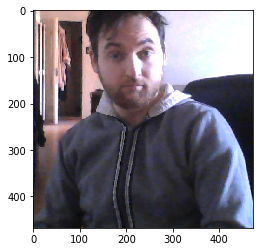

ArturasGreenT tensor(0.0062)
ArturasBlueHoody tensor(0.0494)
ArturasRunnig tensor(0.0493)
ArturasRedHoody tensor(0.1559)
Arturas tensor(0.1470)


In [61]:
for img in lp:
    for i in img:
        plt.imshow(i)
        plt.show()
    
    emb = pe.embed(img)
    for reco in models:
        r = reco(emb)
        for p in r:
            print(reco.name, p[1])
    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [60]:
for m in models:
    m.save()

Model saved at: models/ArturasGreenT.ckpt
Model saved at: models/ArturasBlueHoody.ckpt
Model saved at: models/ArturasRunnig.ckpt
Model saved at: models/ArturasRedHoody.ckpt
Model saved at: models/Arturas.ckpt
